In [2]:
import pandas as pd
import math
import numpy as np

In [61]:
df=pd.read_csv("file.csv")

In [4]:
df.shape

(7789, 11)

In [5]:
df.head(7)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."


In [6]:
df.isna().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

In [7]:
df["Category"].value_counts()

Category
Movie      5379
TV Show    2410
Name: count, dtype: int64

### See how many minutes has a film in average

In [8]:
movies=df[df["Category"]=="Movie"]
movies["Duration"]

1        93 min
2        78 min
3        80 min
4       123 min
6        95 min
         ...   
7783     88 min
7784     99 min
7785    111 min
7786     44 min
7788     90 min
Name: Duration, Length: 5379, dtype: object

In [ ]:
def minutes(value):
    return value.split(" ")[0]

movies["minutes"]=movies["Duration"].apply(lambda x: minutes(x))

In [13]:
movies["minutes"].value_counts()

minutes
90     136
93     131
94     126
91     125
95     119
      ... 
214      1
182      1
224      1
233      1
191      1
Name: count, Length: 201, dtype: int64

In [ ]:
movies["minutes"]=pd.to_numeric(movies["minutes"])

In [15]:
np.mean(movies["minutes"]).round(2)

99.31

### See how many seasons a TV show has in average

In [ ]:
series=df[df["Category"]=="TV Show"]

In [ ]:
def seasons(value):
    return value.split(" ")[0]

series["seasons"]=series["Duration"].apply(lambda x: seasons(x))

In [ ]:
series["seasons"]=pd.to_numeric(series["seasons"])

In [ ]:
np.mean(series["seasons"])

1.7759336099585061

### How many films have made the directors 

In [ ]:
df.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,minutes
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,NaN
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,93


In [ ]:
directors=df.groupby("Director")["Category"].count()
directors.sort_values().tail(10)

Director
Hakan Algül                8
David Dhawan               9
Steven Spielberg          10
Youssef Chahine           12
Jay Chapman               12
Martin Scorsese           12
Cathy Garcia-Molina       13
Jay Karas                 14
Marcus Raboy              16
Raúl Campos, Jan Suter    18
Name: Category, dtype: int64

### Other functions

In [23]:
df.shape

(7789, 13)

In [26]:
df.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description', 'minutes',
       'release_year'],
      dtype='object')

In [27]:
df.dtypes

Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
minutes         object
release_year    object
dtype: object

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
 11  minutes       5379 non-null   object
 12  release_year  7779 non-null   object
dtypes: object(13)
memory usage: 791.2+ KB


#### Movie that lasts the longest

In [ ]:
print(movies["minutes"].min())
print(movies["minutes"].max())
print(series["seasons"].min())
print(series["seasons"].max())


3
312
1
16


In [ ]:
movies[movies["minutes"]==312]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,minutes
957,s958,Movie,Black Mirror: Bandersnatch,NaN,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,"December 28, 2018",TV-MA,312 min,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",312


In [ ]:
movies["minutes"].sort_values().tail(5) #the longest 5 films

5109    230
3694    233
4490    237
6852    253
957     312
Name: minutes, dtype: int64

In [ ]:
movies[movies["minutes"]==253]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,minutes
6852,s6851,Movie,The School of Mischief,Houssam El-Din Mustafa,"Suhair El-Babili, Adel Emam, Saeed Saleh, Youn...",Egypt,"May 21, 2020",TV-14,253 min,"Comedies, Dramas, International Movies",A high school teacher volunteers to transform ...,253


#### Shortest films

In [ ]:
movies["minutes"].sort_values().head(5)

5606     3
5695     5
1501     8
1203     9
463     10
Name: minutes, dtype: int64

In [ ]:
movies[movies["minutes"]==10]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,minutes
463,s464,Movie,American Factory: A Conversation with the Obamas,NaN,"President Barack Obama, Michelle Obama, Julia ...",United States,"September 5, 2019",TV-G,10 min,Documentaries,Barack and Michelle Obama talk with directors ...,10


#### Countries that have made the most movies

In [ ]:
countries=df.groupby("Country")["Category"].count()
countries.sort_values().tail(19)

Country
Germany                            61
United Kingdom, United States      64
Indonesia                          70
Philippines                        71
Nigeria                            71
Brazil                             72
Taiwan                             78
Australia                          83
Turkey                            100
Mexico                            100
Egypt                             101
France                            115
Spain                             134
Canada                            177
South Korea                       183
Japan                             226
United Kingdom                    397
India                             923
United States                    2556
Name: Category, dtype: int64

#### Add release year of the films

In [ ]:
df.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,minutes
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,NaN
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,93


In [16]:
def extract_year(value):
    #in case there's NA values
    if pd.isna(value):
        return np.nan
    return value.split(",")[1].strip()


df["release_year"]=df["Release_Date"].apply(lambda x: extract_year(x))

In [22]:
df["release_year"].value_counts().sort_index()

release_year
2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      25
2015      88
2016     443
2017    1225
2018    1685
2019    2154
2020    2010
2021     117
Name: count, dtype: int64

### Look if there are duplicated values

In [34]:
df[df.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,minutes,release_year


In [33]:
df=df.drop_duplicates(inplace=True)

#### Find house of cards movie

In [36]:
df[df["Title"]=="House of Cards"]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,minutes,release_year
2832,s2833,TV Show,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"November 2, 2018",TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...,NaN,2018


In [44]:
df[df["Title"].str.contains("House of Cards")]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,minutes,release_year
2832,s2833,TV Show,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"November 2, 2018",TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...,NaN,2018


#### In which year was the highest number of TV shows & Movies released? Show with bar graph

In [51]:
df["date"]=pd.to_datetime(df["Release_Date"])

In [53]:
df["year_pandas"]=df["date"].dt.year

In [55]:
df["date"].dt.year.value_counts().sort_values()

date
2010       1
2008       1
2009       2
2012       3
2013       6
2011      13
2014      14
2015      47
2021      75
2016     200
2017     727
2018    1098
2020    1177
2019    1309
Name: count, dtype: int64

<Axes: xlabel='release_year'>

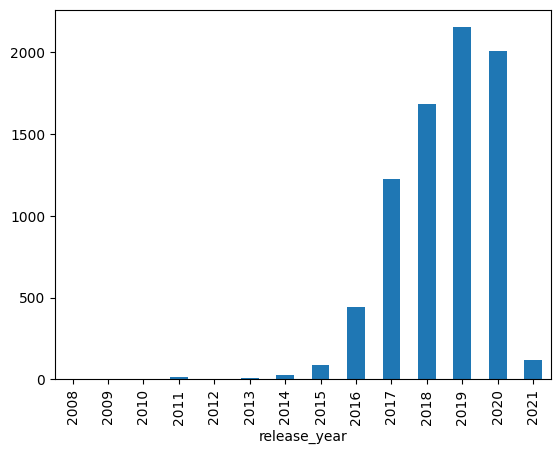

In [46]:
df.groupby("release_year")["Title"].count().plot.bar()

#### Another way to see how many movies & series there are

In [56]:
import seaborn as sns

<Axes: xlabel='count', ylabel='Category'>

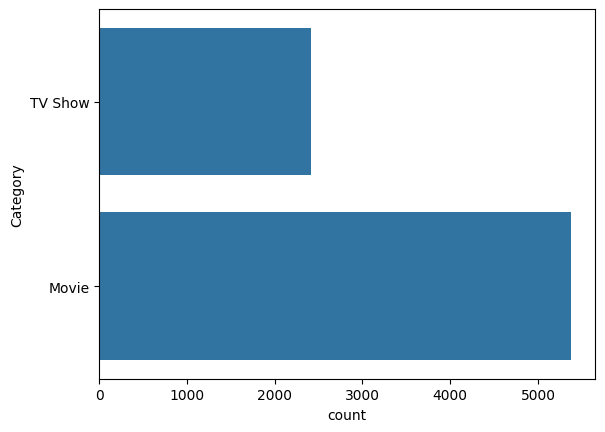

In [62]:
sns.countplot(df["Category"])

In [67]:
df.tail(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7788,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


#### Show all records where "category is movie and type is comedies" or "country is united kingdom"

In [76]:
df[((df["Category"]=="Movie")&(df["Type"].str.contains("Comedies")))|(df["Country"].str.contains("United Kingdom"))].head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
18,s19,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,"March 29, 2019",TV-14,124 min,"Comedies, Dramas, Independent Movies","On India's Independence Day, a zany mishap in ..."
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,"May 16, 2018",TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th..."
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
34,s35,Movie,#Roxy,Michael Kennedy,"Jake Short, Sarah Fisher, Booboo Stewart, Dann...",Canada,"April 10, 2019",TV-14,105 min,"Comedies, Romantic Movies",A teenage hacker with a huge nose helps a cool...
36,s37,Movie,#Selfie,Cristina Jacob,"Flavia Hojda, Crina Semciuc, Olimpia Melinte, ...",Romania,"June 1, 2019",TV-MA,125 min,"Comedies, Dramas, International Movies","Two days before their final exams, three teen ..."


#### In how many movies/series was Tom Cruise part of the cast?

In [ ]:
df["Cast"]=df["Cast"].fillna(" ")

In [86]:
df.isna().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast               0
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

In [87]:
df[df["Cast"].str.contains("Tom Cruise")]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,"January 1, 2020",R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and..."
5071,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,"July 1, 2019",R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...


#### Other way to find different types of ratings for netflix movies

In [89]:
df.Rating.nunique()

14

In [90]:
df.Rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)